In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re # regular expression 
import tweepy #access to tweet app
from tweepy import OAuthHandler #authenication 
from textblob import TextBlob #text/tweet parse

## Twitter API dealing class

In [2]:
class TwitterClient(object):
    # Connecting to Twitter API
    def __init__(self):  
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'TL7RyLnfilYH6xaoAlS0XFDCg'
        consumer_secret = 'u5uBn4P62PMIxT4uwUVTl1Ycx4rsfByFs6jl2e4SQ9zDjPIzCO'
        access_token = '919434545924935681-2woCDEXuXQdhJewDaCRBqHBYmi5SFDN'
        access_token_secret = 'T29jqUm6rZqsRYO7AGc47GlgYTaAaN5OtJD0DATo1uBjh'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
            print('auth. success')
            
            
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        # Utility function to clean tweet text by removing links, special characters using simple regex statements.
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
    
 
    def get_tweet_sentiment(self, tweet):
        # Utility function to classify sentiment of passed tweet using textblob's sentiment method
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count=10):
        # Main function to fetch tweets and parse them.
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

## Applying Sentimental Analysis

In [3]:
def get_tweet_result(leader):    
    #print(leader)
     # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = leader, count = 200) #no. of tweets
    #print(tweets)
    
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    
    result=[];                           
    # percentage of positive tweets
    #print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    result.append(format(100*len(ptweets)/len(tweets)))
    
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    #print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    result.append(format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    #print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    result.append(format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

    return result

### List of leaders

In [4]:
leaders=['Narendra Modi','Rahul Gandhi','Donald Trump', 'Amit Shah']
#Can pass name of any leader as you wish by just appending leader name string 
#Can also pass any name which has twitter account

## Fetching Tweet of each leaders

In [5]:
def gettweet():
    res=[]
    # calling main function
    for l in leaders:
        res.append(get_tweet_result(l))        
    #print(res)
    return res

In [6]:
res = gettweet()
print(res)

auth. success
auth. success
auth. success
auth. success
[['23.333333333333332', '6.666666666666667', '70.0'], ['23.333333333333332', '13.333333333333334', '63.333333333333336'], ['28.0', '20.0', '52.0'], ['12.5', '10.416666666666666', '77.08333333333333']]


## Ploting Twitter Sentimental Analysis

In [7]:
positive=[]
negative=[]
neutral=[]

for i in range(0,len(res)):
    positive.append(res[i][0])
    negative.append(res[i][1])
    neutral.append(res[i][2])

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

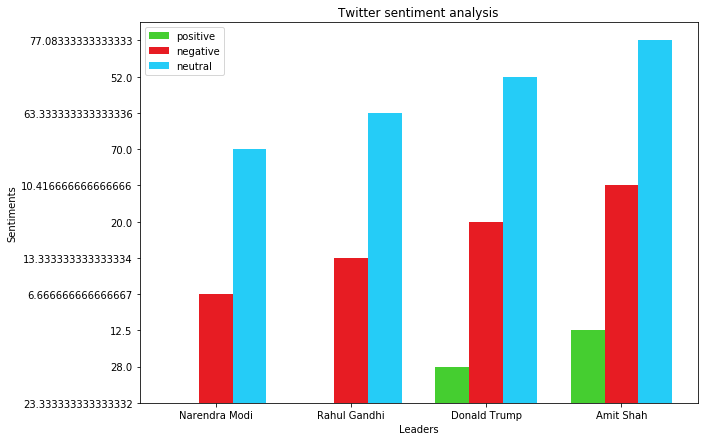

In [9]:
n_groups = len(leaders)   # No. of leaders 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = (1/n_groups)
opacity = 1
 
rects1 = plt.bar(index, positive, bar_width,
                 alpha=opacity,
                 color='#45CE30',
                 label='positive')
 
rects2 = plt.bar(index + bar_width, negative, bar_width,
                 alpha=opacity,
                 color='#E71C23',
                 label='negative')

rects3 = plt.bar(index + bar_width+ bar_width, neutral, bar_width,
                 alpha=opacity,
                 color='#25CCF7',
                 label='neutral')


plt.xlabel('Leaders')
plt.ylabel('Sentiments')
plt.title('Twitter sentiment analysis')
plt.xticks(index + bar_width, leaders)
plt.legend()
plt.show()